## &#x1F310; &nbsp; Code Library, Style, and Links
The previous notebooks:

&#x1F310; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)

&#x1F310; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F310; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

In [60]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}              
</style>

In [61]:
import numpy as np 
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from descartes import PolygonPatch

from IPython.display import HTML

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

In [62]:
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
    print("_______________________________________")
    print(regressor)
    print("_______________________________________")
    print("EV score. Train: ", explained_variance_score(y_train, y_train_reg))
    print("EV score. Test: ", explained_variance_score(y_test, y_test_reg))
    print("---------")
    print("R2 score. Train: ", r2_score(y_train, y_train_reg))
    print("R2 score. Test: ", r2_score(y_test, y_test_reg))
    print("---------")
    print("MSE score. Train: ", mean_squared_error(y_train, y_train_reg))
    print("MSE score. Test: ", mean_squared_error(y_test, y_test_reg))
    print("---------")
    print("MAE score. Train: ", mean_absolute_error(y_train, y_train_reg))
    print("MAE score. Test: ", mean_absolute_error(y_test, y_test_reg))
    print("---------")
    print("MdAE score. Train: ", median_absolute_error(y_train, y_train_reg))
    print("MdAE score. Test: ", median_absolute_error(y_test, y_test_reg))

## &#x1F310; &nbsp; Load and Preprocess the Data

In [63]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
school_explorer.shape, d5_shsat.shape

((1272, 161), (140, 7))

In [64]:
# Fillna or replace values
numeric_list = list(school_explorer\
.columns[[7,8]+list(range(16,27))+[28,30,32,34,36]+list(range(42,161))])
target_list = ['Average ELA Proficiency','Average Math Proficiency']
len(numeric_list)

school_explorer = school_explorer.drop(['Adjusted Grade',
                                        'New?',
                                        'Other Location Code in LCGMS'], 
                                       axis=1)
school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
school_explorer['Economic Need Index'] = \
school_explorer['Economic Need Index'].interpolate()
school_explorer['Average ELA Proficiency'] = \
school_explorer['Average ELA Proficiency'].interpolate()
school_explorer['Average Math Proficiency'] = \
school_explorer['Average Math Proficiency'].interpolate()

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].interpolate()

rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Strong Family-Community Ties Rating',
               'Trust Rating','Student Achievement Rating']

for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value) 
    
category_list1 = ['District','Community School?','City','Grades']
                  
category_list2 = ['Rigorous Instruction Rating',
                  'Collaborative Teachers Rating',
                  'Supportive Environment Rating',
                  'Effective School Leadership Rating',
                  'Strong Family-Community Ties Rating',
                  'Trust Rating','Student Achievement Rating']

for feature in category_list1:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]
    
for feature in category_list2:
    feature_pairs = dict(zip(['Not Meeting Target', 'Meeting Target', 
                              'Approaching Target', 'Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature] = school_explorer[feature].astype(int)
    
category_list = list(category_list1+category_list2)
    
print('NaN count = ', sum(school_explorer.isna().sum()))    

NaN count =  0


In [65]:
# Merge two datasets
d5_shsat_2016 = d5_shsat[['DBN','Number of students who registered for the SHSAT',
                          'Number of students who took the SHSAT']][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)

d5_shsat_2016['Took SHSAT %'] = d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']

d5_shsat_2016['Took SHSAT %'] = d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x: round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'}, inplace=True)

d5_shsat_2016 = pd.merge(school_explorer[['Location Code']+numeric_list+target_list],
                         d5_shsat_2016, 
                         on='Location Code')
d5_shsat_2016.shape

(21, 143)

## &#x1F310; &nbsp; Split the Data for Regressor Training

#### The first set of features

In [66]:
# data = school_explorer, features = numeric veriables, targets = Average Math Proficiency
features = school_explorer[numeric_list].values
targets = school_explorer['Average Math Proficiency'].values

X_train1, X_test1, y_train1, y_test1 = \
train_test_split(features, targets, test_size=0.2, random_state=1)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1017, 137), (255, 137), (1017,), (255,))

In [67]:
# data = school_explorer, features = numeric veriables, targets = Average ELA Proficiency
features = school_explorer[numeric_list].values
targets = school_explorer['Average ELA Proficiency'].values

X_train2, X_test2, y_train2, y_test2 = \
train_test_split(features, targets, test_size=0.2, random_state=1)
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1017, 137), (255, 137), (1017,), (255,))

#### The second set of features

In [90]:
# data = school_explorer, 
features_list = percent_list+category_list+['School Income Estimate','Economic Need Index'] 
# targets = Average Math Proficiency
features = school_explorer[features_list].values
targets = school_explorer['Average Math Proficiency'].values

X_train3, X_test3, y_train3, y_test3 = \
train_test_split(features, targets, test_size=0.2, random_state=1)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1017, 27), (255, 27), (1017,), (255,))

In [91]:
# data = school_explorer, 
features_list = percent_list+category_list+['School Income Estimate','Economic Need Index'] 
# targets = Average ELA Proficiency
features = school_explorer[features_list].values
targets = school_explorer['Average ELA Proficiency'].values

X_train4, X_test4, y_train4, y_test4 = \
train_test_split(features, targets, test_size=0.2, random_state=1)
X_train4.shape, X_test4.shape, y_train4.shape, y_test4.shape

((1017, 27), (255, 27), (1017,), (255,))

## &#x1F310; &nbsp; Fit the Regressors

#### The first set of features
The predictions are based on the data about the financial situation, social environment, ethnic composition and test results of each grade.

In [68]:
y_train_gbr1, y_test_gbr1 = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=137), 
           X_train1, X_test1, y_train1)

scores('Gradient Boosting Regressor \nAverage Math Proficiency', 
       y_train1, y_test1, y_train_gbr1, y_test_gbr1)

_______________________________________
Gradient Boosting Regressor 
Average Math Proficiency
_______________________________________
EV score. Train:  0.9801848736946983
EV score. Test:  0.8898605877774407
---------
R2 score. Train:  0.9801848736946983
R2 score. Test:  0.8898002399933332
---------
MSE score. Train:  0.004318660245727964
MSE score. Test:  0.023526367188444364
---------
MAE score. Train:  0.05088943632983992
MAE score. Test:  0.11615887970619676
---------
MdAE score. Train:  0.040694046585669774
MdAE score. Test:  0.09274693234295706


In [69]:
y_train_br1, y_test_br1 = \
regression(BaggingRegressor(n_estimators=137), 
           X_train1, X_test1, y_train1)

scores('Bagging Regressor \nAverage Math Proficiency', 
       y_train1, y_test1, y_train_br1, y_test_br1)

_______________________________________
Bagging Regressor 
Average Math Proficiency
_______________________________________
EV score. Train:  0.97765846392382
EV score. Test:  0.8773530892408116
---------
R2 score. Train:  0.9776489736854116
R2 score. Test:  0.8773490695892411
---------
MSE score. Train:  0.004871353697614664
MSE score. Test:  0.02618454726828158
---------
MAE score. Train:  0.050004569520104625
MAE score. Test:  0.12422925910023383
---------
MdAE score. Train:  0.03737226277372896
MdAE score. Test:  0.09979014598540159


In [70]:
y_train_gbr2, y_test_gbr2 = \
regression(GradientBoostingRegressor(max_depth=5, n_estimators=274), 
           X_train2, X_test2, y_train2)

scores('Gradient Boosting Regressor \nAverage ELA Proficiency', 
       y_train2, y_test2, y_train_gbr2, y_test_gbr2)

_______________________________________
Gradient Boosting Regressor 
Average ELA Proficiency
_______________________________________
EV score. Train:  0.9990047193898323
EV score. Test:  0.876665332175835
---------
R2 score. Train:  0.9990047193898323
R2 score. Test:  0.8765978043273807
---------
MSE score. Train:  0.0001251506286896274
MSE score. Test:  0.017723307986226546
---------
MAE score. Train:  0.008396192726174782
MAE score. Test:  0.09825254965385671
---------
MdAE score. Train:  0.006189548213040297
MdAE score. Test:  0.07390207189036646


In [71]:
y_train_br2, y_test_br2 = \
regression(BaggingRegressor(n_estimators=137), 
           X_train2, X_test2, y_train2)

scores('Bagging Regressor \nAverage ELA Proficiency', 
       y_train1, y_test2, y_train_br2, y_test_br2)

_______________________________________
Bagging Regressor 
Average ELA Proficiency
_______________________________________
EV score. Train:  0.8212319513610602
EV score. Test:  0.8447065797708595
---------
R2 score. Train:  0.7338664327723705
R2 score. Test:  0.8446827154199149
---------
MSE score. Train:  0.05800318600705676
MSE score. Test:  0.022307026671552363
---------
MAE score. Train:  0.18613230913880102
MAE score. Test:  0.10774900052478417
---------
MdAE score. Train:  0.14856447688564556
MdAE score. Test:  0.07520072992700788


#### The second set of features
The predictions are based on the data about the financial situation, social environment, ethnic composition and geoposition.

In [87]:
y_train_gbr3, y_test_gbr3 = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=81), 
           X_train3, X_test3, y_train3)

scores('Gradient Boosting Regressor \nAverage Math Proficiency', 
       y_train3, y_test3, y_train_gbr3, y_test_gbr3)

_______________________________________
Gradient Boosting Regressor 
Average Math Proficiency
_______________________________________
EV score. Train:  0.9501486917252991
EV score. Test:  0.8614737393870219
---------
R2 score. Train:  0.950148691725299
R2 score. Test:  0.861079670552112
---------
MSE score. Train:  0.010864975571004973
MSE score. Test:  0.02965787475701355
---------
MAE score. Train:  0.08038728735945012
MAE score. Test:  0.13017450662650937
---------
MdAE score. Train:  0.06329352049169534
MdAE score. Test:  0.09512952380346862


In [89]:
y_train_br3, y_test_br3 = \
regression(BaggingRegressor(n_estimators=81), 
           X_train3, X_test3, y_train3)

scores('Bagging Regressor \nAverage Math Proficiency', 
       y_train3, y_test3, y_train_br3, y_test_br3)

_______________________________________
Bagging Regressor 
Average Math Proficiency
_______________________________________
EV score. Train:  0.9725628518858588
EV score. Test:  0.8480473685610573
---------
R2 score. Train:  0.9725511146096106
R2 score. Test:  0.8480454110665488
---------
MSE score. Train:  0.005982420111715425
MSE score. Test:  0.03244053757468458
---------
MAE score. Train:  0.05423358967511161
MAE score. Test:  0.13827265391753416
---------
MdAE score. Train:  0.03765432098765498
MdAE score. Test:  0.1080246913580254


In [93]:
y_train_gbr4, y_test_gbr4 = \
regression(GradientBoostingRegressor(max_depth=4, n_estimators=81), 
           X_train4, X_test4, y_train4)

scores('Gradient Boosting Regressor \nAverage ELA Proficiency', 
       y_train4, y_test4, y_train_gbr4, y_test_gbr4)

_______________________________________
Gradient Boosting Regressor 
Average ELA Proficiency
_______________________________________
EV score. Train:  0.9501661328862839
EV score. Test:  0.8486313279809522
---------
R2 score. Train:  0.9501661328862839
R2 score. Test:  0.8485567128013896
---------
MSE score. Train:  0.006266312973047408
MSE score. Test:  0.021750634231730123
---------
MAE score. Train:  0.0622058175201625
MAE score. Test:  0.10536544148435166
---------
MdAE score. Train:  0.053003829566543814
MdAE score. Test:  0.08340882415799156


In [94]:
y_train_br4, y_test_br4 = \
regression(BaggingRegressor(n_estimators=81), 
           X_train4, X_test4, y_train4)

scores('Bagging Regressor \nAverage ELA Proficiency', 
       y_train4, y_test4, y_train_br4, y_test_br4)

_______________________________________
Bagging Regressor 
Average ELA Proficiency
_______________________________________
EV score. Train:  0.9734102893983936
EV score. Test:  0.83544093621616
---------
R2 score. Train:  0.9733916395599593
R2 score. Test:  0.8351674417218872
---------
MSE score. Train:  0.003345843376683409
MSE score. Test:  0.023673632228318853
---------
MAE score. Train:  0.041065572510126276
MAE score. Test:  0.1098659727265392
---------
MdAE score. Train:  0.03024691358024567
MdAE score. Test:  0.08077880658436154


## &#x1F310; &nbsp; Display Predictions

#### The first set of features

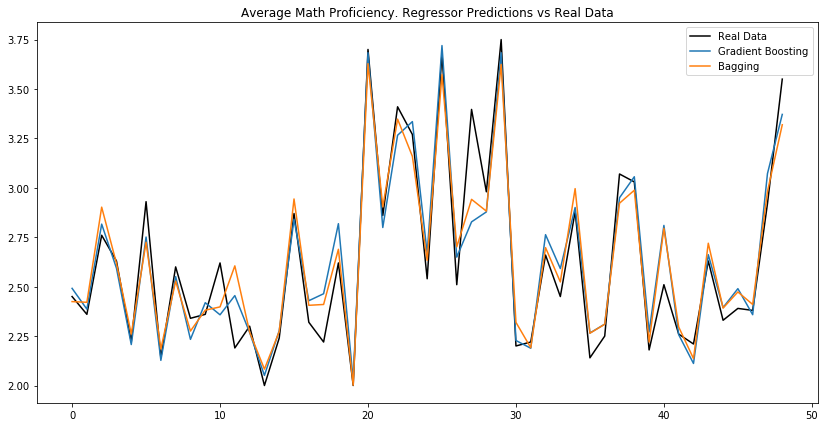

In [72]:
plt.figure(figsize = (14, 7))

plt.plot(y_test1[1:50], color = 'black', label='Real Data')
plt.plot(y_test_gbr1[1:50], label='Gradient Boosting')
plt.plot(y_test_br1[1:50], label='Bagging')

plt.legend()
plt.title("Average Math Proficiency. Regressor Predictions vs Real Data");

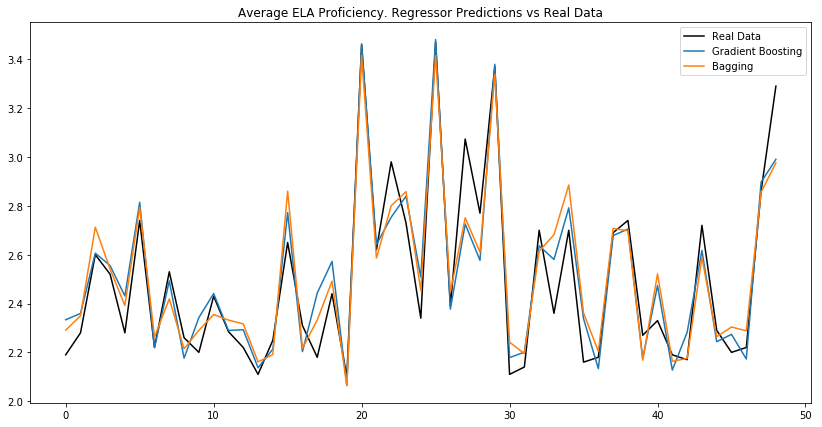

In [73]:
plt.figure(figsize = (14, 7))

plt.plot(y_test2[1:50], color='black', label='Real Data')
plt.plot(y_test_gbr2[1:50], label='Gradient Boosting')
plt.plot(y_test_br2[1:50], label='Bagging')

plt.legend()
plt.title("Average ELA Proficiency. Regressor Predictions vs Real Data");

The numerical variables in the presented database about the financial situation, social environment, ethnic composition and test results of each grade  make it possible to predict the indicators of learning outcomes `Average Math Proficiency`, `Average ELA Proficiency` quite well (0.84-0.89 is a really high level for R2).

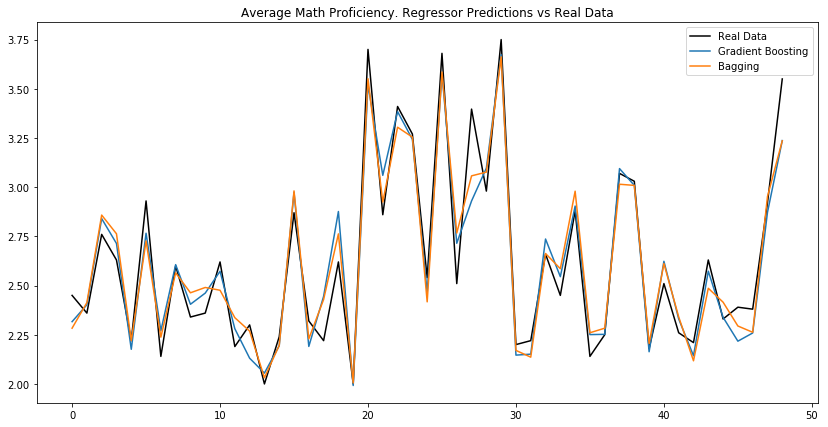

In [95]:
plt.figure(figsize = (14, 7))

plt.plot(y_test3[1:50], color = 'black', label='Real Data')
plt.plot(y_test_gbr3[1:50], label='Gradient Boosting')
plt.plot(y_test_br3[1:50], label='Bagging')

plt.legend()
plt.title("Average Math Proficiency. Regressor Predictions vs Real Data");

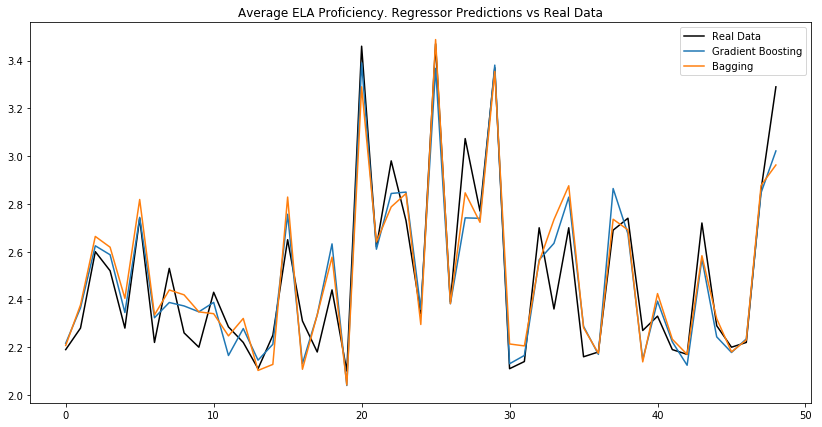

In [96]:
plt.figure(figsize = (14, 7))

plt.plot(y_test4[1:50], color='black', label='Real Data')
plt.plot(y_test_gbr4[1:50], label='Gradient Boosting')
plt.plot(y_test_br4[1:50], label='Bagging')

plt.legend()
plt.title("Average ELA Proficiency. Regressor Predictions vs Real Data");

The numerical variables in the presented database about the financial situation, social environment, ethnic composition and geoposition make predictions the indicators of learning outcomes `Average Math Proficiency`, `Average ELA Proficiency`  a little bit worse  (0.83-0.86 for R2).